# OrgaQuant - Single Image Analysis
Quantify the organoid distribution from a brightfield image. This script uses a pre-trained deep learning model to locate the organoids and then quantify diameters (major and minor) and total organoid area. All output values are in units of 'pixels' these need to be scaled to the appropriate scale and units.

## Set all variables
* PATH_TO_CKPT:  Path to frozen detection graph you want to use. This is a pre-trained deep learning model (default is fine).
* PATH_TO_LABELS: List of the strings that is used to add correct label for each box (default is fine).
* IMAGE_PATH: Absolute path to image of the organoids you want to quantify (this must be changed).
* look_pix: The size of the window, a good number is less than 600 pixels but bigger than an organoid (default is fine).
* slide_pix: To achieve redundancy and capture edge organoids, this is a sliding window (default is fine).

__Note: look_pix and slide_pix determine the total number of windows for each frame and hence the total time required to analyze a full image. Good numbers for look_pix is between 300-900 pixels and for slide_pix from 0.5 to 1 * look_pix.__

In [1]:
PATH_TO_CKPT = "C:/Users/Timothy/Desktop/OD/object_detection/organoid_inference_graph/frozen_inference_graph.pb"
PATH_TO_LABELS = "C:/Users/Timothy/Desktop/OD/object_detection/data/organoid_label_map.pbtxt"
IMAGE_PATH = "C:/Users/Timothy/Desktop/OrgaQuant Paper/Example Analysis/Ana/test.tif"
look_pix = 800
slide_pix = 800

## Import libraries

In [2]:
import sys
import os
sys.path.append("..")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from utils import visualization_utils as vis_util
from organoid_utils import detect_all_organoids, get_metrics
%matplotlib inline

C:\Users\Timothy\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Get bounding boxes
This takes several minutes to run. It returns organoids with a 95% confidence.

In [3]:
[boxes, scores, classes, category_index, padded_image_np, full_image_np] = detect_all_organoids(IMAGE_PATH,PATH_TO_CKPT, 
                                                                                                PATH_TO_LABELS, 
                                                                                                NUM_CLASSES = 1, 
                                                                                                look_pix=look_pix, 
                                                                                                slide_pix=slide_pix,
                                                                                                thresh=0.95)

Analyzing patch 1 of 4 starting from (0,0) image coordinates...
Analyzing patch 2 of 4 starting from (800,0) image coordinates...
Analyzing patch 3 of 4 starting from (0,800) image coordinates...
Analyzing patch 4 of 4 starting from (800,800) image coordinates...


## Visualize the detection results and save detection image
Bounding boxes are drawn around the detected organoids. A png version of the image is also automatically saved in the same folder as the original image. The image is not needed for further anlysis but it is good to have it on record to confirm accurate detection.

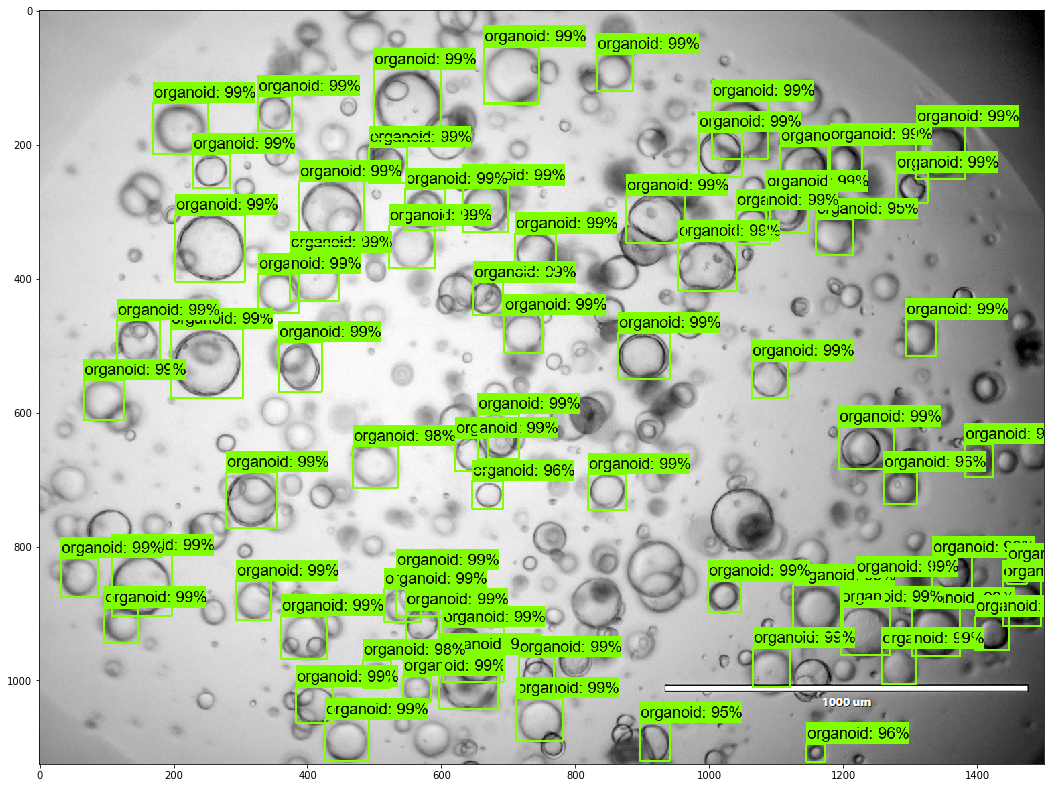

In [4]:
vis_util.visualize_boxes_and_labels_on_image_array(
    full_image_np,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=False,
    max_boxes_to_draw=None,
    min_score_thresh=0.00,
    line_thickness=3)

plt.figure(figsize=(18,18))
plt.imshow(full_image_np)
plt.imsave(IMAGE_PATH + '_detected.png', full_image_np)

## Save Results

In [7]:
# Get metrics
[x1, y1, x2, y2, org_area, d_max, d_min] = get_metrics(boxes)

# Save metrics
results = pd.DataFrame(data={'xmin': x1,
                             'ymin': y1,
                             'xmax': x2,
                             'ymax': y2,
                             'area': org_area, 
                             'max dia': d_max, 
                             'min dia': d_min})

results.to_csv(IMAGE_PATH + '.csv', index=False, columns=['xmin', 'ymin', 'xmax', 'ymax', 'area', 'max dia', 'min dia'])

## Backup Code

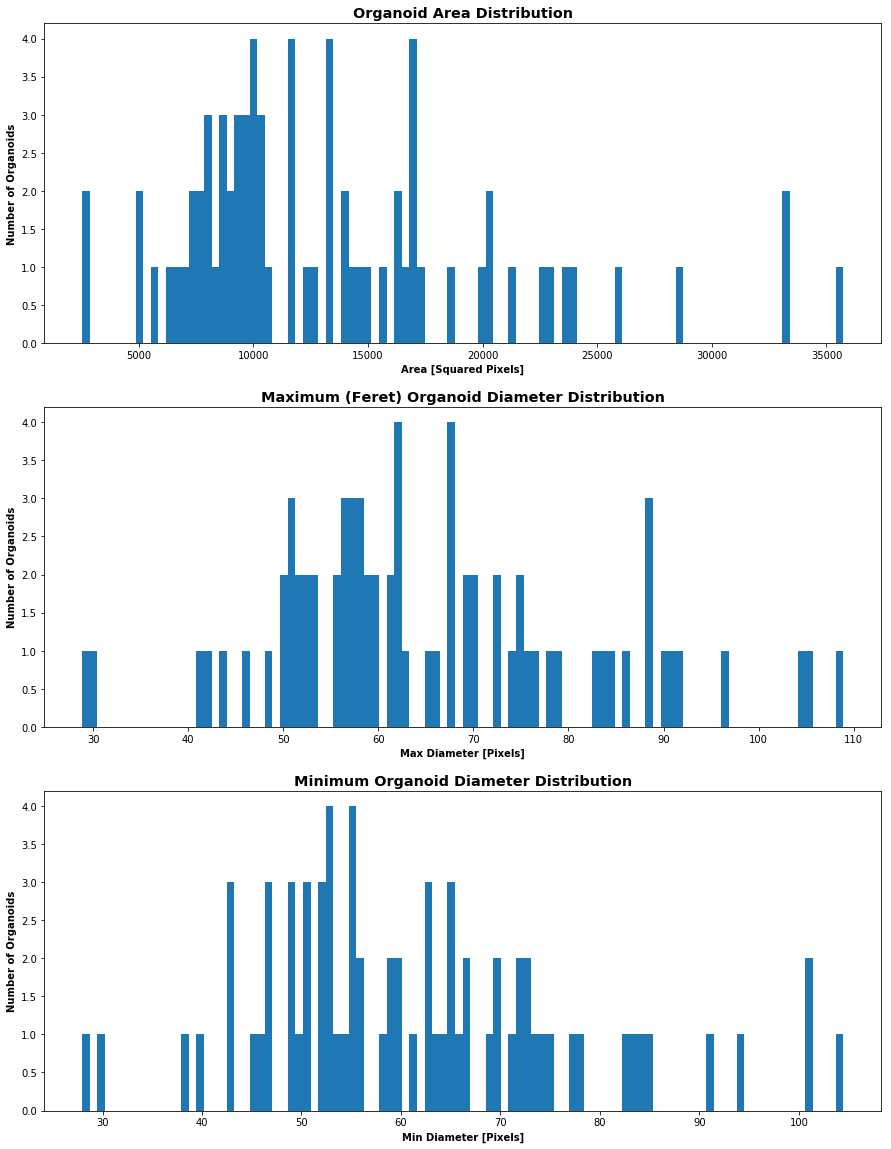

In [6]:
"""
plt.figure(figsize=(15,20))

plt.subplot(3,1,1)
plt.hist(org_area, bins= 100)
plt.title('Organoid Area Distribution', weight='bold', size='x-large')
plt.xlabel('Area [Squared Pixels]', weight='bold')
plt.ylabel('Number of Organoids', weight='bold')

plt.subplot(3,1,2)
plt.hist(d_max, bins=100)
plt.title('Maximum (Feret) Organoid Diameter Distribution', weight='bold', size='x-large')
plt.xlabel('Max Diameter [Pixels]', weight='bold')
plt.ylabel('Number of Organoids', weight='bold')

plt.subplot(3,1,3)
plt.hist(d_min, bins=100)
plt.title('Minimum Organoid Diameter Distribution', weight='bold', size='x-large')
plt.xlabel('Min Diameter [Pixels]', weight='bold')
plt.ylabel('Number of Organoids', weight='bold')

plt.show()

"""